In [28]:
!pip install -U langgraph langsmith


In [29]:
!pip install dotenv

In [30]:
from dotenv import load_dotenv
load_dotenv()
import os

MISTRAL_API_KEY = os.getenv("MISTRAL_API_KEY")

In [31]:
!pip install langchain_ollama langchain_nomic langchain_mistralai

In [32]:
from langchain_ollama import OllamaEmbeddings
from langchain_nomic import NomicEmbeddings
from langchain_mistralai import ChatMistralAI

# For the embedding we, are going to use OllamaEmbeddings with the nomic-embed-text model
# This model is a 7B model that is trained to embed text
embeddings = OllamaEmbeddings(
    model="nomic-embed-text"
)


In [33]:
mistral_model = ChatMistralAI(model="mistral-large-latest", temperature=0, api_key=MISTRAL_API_KEY)

In [34]:
from typing import (
    Annotated,
    Sequence,
    TypedDict,
)
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    """The state of the agent."""
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [35]:
!pip install Pillow langchain 

In [36]:
import fitz  # PyMuPDF
from PIL import Image
import pytesseract
from langchain.text_splitter import RecursiveCharacterTextSplitter

def extract_text_from_pdf(path: str) -> str:
    """Extracts text from a PDF, falling back to OCR if necessary."""
    doc = fitz.open(path)
    all_text = ""
    for page in doc:
        text = page.get_text()
        if not text.strip():
            # Fallback to OCR
            pix = page.get_pixmap()
            img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
            text = pytesseract.image_to_string(img)
        all_text += text
    return all_text

def chunk_text(text: str) -> list[str]:
    """Chunks extracted text using a recursive splitter."""
    splitter = RecursiveCharacterTextSplitter(chunk_size=800, chunk_overlap=100)
    return splitter.split_text(text)


In [37]:
from PIL import Image
import pytesseract
import fitz 

def tesseract_ocr_from_pdf(path: str) -> str:
    """
    Extracts text from all pages of a PDF using OCR (Tesseract).
    This tool ignores text extraction and forces OCR on each page image.
    """
    doc = fitz.open(path)
    all_text = ""
    for page in doc:
        pix = page.get_pixmap()
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        text = pytesseract.image_to_string(img)
        all_text += text + "\n"
    return all_text


In [38]:
print(tesseract_ocr_from_pdf("./testingII.png"))

sausweis ... fiir Wohngebaude

16 Enorolesinspervrardnung(EnEV) vom" 18.10.20

Endenergiebedart dieses Gebiuden

i |
a

100 125 180175200225 >250

|

‘kwhvime-a) |

exact unt de Gets

jobedart dieses Gebaudes
{Ptichtangabe in immobitenenzelgen)

‘Angaben zum EEWarmeG”

{Romagna eae
{Enen-ttmegesctzs (erat

mee re dr EnV ae snghaon
| oe
|


Ce a emma

Ades: Sha 0 90 36a

|

é a i
Gebaudia ances Guttude |
|

|

|

|

Seca Shin

Savishr Warmeerzauger* | 1990
i (riwitig)

| Anzahl Wohnungen 88
| Gebaudenutzflache (A) (8087.52 me rm» 0 a te ote rte
ecm Ferg
| eta Sree, fr ergee
| reverb Eneion an rome
felts te Amaating |e Cine ae
(atresia? te tery "i

| © Sy Eampeumnei mie ou ar Gnas von Beciunoun des Enerpatocens cen {Emwgibestesusis
| ede emtintte i au Sete 2 genet. Zasickre armetonen eet re,
* erdeaata mt wd Grndace vn Aunrngen Se oogereeoe nee
{Evercievertouchsauswes}, Oe Epctise tin of Soles operon |
Petovarbebung Bedor/ Verbeuch dich Eigantimer | Aussaey |

en Ena Sed ate fcmatnen a e

In [39]:
print(extract_text_from_pdf("./testing.pdf"))

UNITED STATES
SECURITIES AND EXCHANGE COMMISSION
Washington, D.C. 20549
FORM 10-Q
(Mark One)
☒ QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
For the quarterly period ended June 25, 2022
or
☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
For the transition period from              to             .
Commission File Number: 001-36743
Apple Inc.
(Exact name of Registrant as specified in its charter)
California
94-2404110
(State or other jurisdiction
of incorporation or organization)
(I.R.S. Employer Identification No.)
One Apple Park Way
Cupertino, California
95014
(Address of principal executive offices)
(Zip Code)
(408) 996-1010
(Registrant’s telephone number, including area code)
Securities registered pursuant to Section 12(b) of the Act:
Title of each class
Trading symbol(s)
Name of each exchange on which registered
Common Stock, $0.00001 par value per share
AAPL
The Nasdaq Stock Market LLC
1.000% Notes

In [ ]:
import psycopg2

class CockroachDBAgent:
    def __init__(self, connection_string):
        """Initialize with a connection string"""
        self.connection_string = connection_string
        self.connection =  self.connect()
        self.cursor = None
    
    def connect(self):
        """Establish a connection using the connection string"""
        try:
            self.connection = psycopg2.connect(self.connection_string)
            self.cursor = self.connection.cursor()
            print("Connected to CockroachDB successfully!")
        except Exception as e:
            print(f"Error: Unable to connect to the database: {e}")
    

    def insert_record(self,id, company, description):
        """Insert a new Dataset into the knowledge database"""
        try:
            self.cursor.execute(
                """
                INSERT INTO (id, company, description)
                VALUES (%s, %s)
                """,
                (id, company, description)
            )
            self.connection.commit()
            print(f"Record inserted successfully!")
        except Exception as e:
            print(f"Error inserting record {e}")
    

    # Fetch all of the records that is within the knowlege data base
    def get_record(self):
        """Fetch and return all record from the database"""
        try:
            self.cursor.execute("SELECT * FROM Database")
            rows = self.cursor.fetchall()
            return rows
        except Exception as e:
            print(f"Error fetching candidates: {e}")
            return []
    
    # Close the DBMS session 
    def close(self):
        """Close the connection to the database"""
        if self.cursor:
            self.cursor.close()
        if self.connection:
            self.connection.close()
        print("Connection closed.")
        
    def as_retriver(self): 
        return self

In [40]:
!pip install langchain_community pinecone

In [63]:
import os
from pinecone import Pinecone as PineconeClient, ServerlessSpec
from langchain.vectorstores import Pinecone as LangchainPinecone
from langchain.embeddings import OllamaEmbeddings

pinecone_client = PineconeClient(api_key=os.getenv("PINECONE_API_KEY"))

INDEX_NAME = os.getenv("INDEX_NAME")

def upsert_to_pinecone(chunks: list[str]) -> None:
    """Embed text chunks and upsert into Pinecone vector database."""

    embeddings = OllamaEmbeddings(model="nomic-embed-text")

    # Create index if it doesn't exist
    if INDEX_NAME not in [index.name for index in pinecone_client.list_indexes()]:
        pinecone_client.create_index(
            name=INDEX_NAME,
            dimension=768,
            spec=ServerlessSpec(
                cloud="aws",  # or "gcp"
                region=os.getenv("PINECONE_ENVIRONMENT", "us-east-1")
            )
        )

    vectorstore = LangchainPinecone.from_existing_index(index_name=INDEX_NAME, embedding=embeddings)
    vectorstore.add_texts(chunks)


In [73]:


# pdf_text = extract_text_from_pdf("./testing.pdf")
# text_chunks = chunk_text(pdf_text)
from langchain.tools import Tool

# Your actual upsert function
def upsert_to_pinecone(chunks: list[str]) -> str:
    # Embedding and Pinecone logic here
    print("Upserting", len(chunks), "chunks to Pinecone...")
    return f"Successfully upserted {len(chunks)} chunks to Pinecone."

# Wrap the function as a Tool
upsert_tool = Tool(
    name="upsert_to_pinecone",
    func=upsert_to_pinecone,
    description="Embeds a list of text chunks and upserts them into a Pinecone vector index."
)


In [42]:

tools = [extract_text_from_pdf, upsert_to_pinecone, tesseract_ocr_from_pdf]

In [43]:
import json
from langchain_core.messages import ToolMessage, SystemMessage, AIMessage
from langchain_core.runnables import RunnableConfig
from langgraph.prebuilt import ToolNode

In [44]:
from langchain_core.messages import SystemMessage

def system_prompt() -> SystemMessage:
    """System prompt for data extraction."""
    return SystemMessage(
        content=("""
                 
            You will be given a PDF document containing unstructured data or a URL pointing to the file location.
            Imagine three highly intelligent agents who are experts in document extraction and analysis.
            They are capable of reading and understanding complex documents, extracting key information, and providing structured outputs.
            They can handle unstructured data and convert it into structured formats such as JSON or triplets.

            These agents have access to the following tools:

            extract_text_from_pdf: This tool extracts text from PDF documents, including those with complex layouts or embedded images. And will use tesseract_ocr_from_pdf as a fallback when standard text extraction is insufficient.
            tesseract_ocr_from_pdf: This tool performs OCR on pages with mixed content (e.g., scanned images, photographs, or handwriting) and serves as a fallback when standard text extraction is insufficient.

            The agents will collaborate to ensure the best results. They will:

            Rank every meaningful piece of information based on relevance and importance.

            Clean and structure the extracted data.

            Preserve key metadata, such as page numbers, for accurate source citation.

   
        

            """

        )
    )


In [45]:
import time 

def run_agent(state: AgentState, config: RunnableConfig) -> dict:
    model = mistral_model.bind_tools(tools)
    time.sleep(2)
    response = model.invoke([system_prompt()] + state["messages"], config)

    
    return {"messages": [response]}

In [46]:
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import tools_condition
memory = MemorySaver()


# agent_tool = ToolNode(tools)
agent_tool = ToolNode(tools)
workflow01 = StateGraph(AgentState)


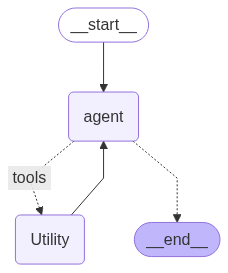

In [47]:

workflow01.add_node("agent", run_agent)
workflow01.add_node("Utility", agent_tool)


workflow01.set_entry_point("agent")


workflow01.add_conditional_edges(
    "agent",
    tools_condition ,
    {
        "tools": "Utility",
        END: END,

    },
)

workflow01.add_edge("Utility", "agent") 

graph01 = workflow01.compile(checkpointer=memory) 


from IPython.display import Image, display
try:
    display(Image(graph01.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [48]:
from langchain_core.messages import HumanMessage

while True:
    user_input = input("Your question: ")
    if user_input.lower() == "exit":
        break

    input_message = [HumanMessage(content=user_input)]
    config = {"configurable": {"session_id": "abc123", "thread_id": "abc123"}}

    for step in graph01.stream({"messages": input_message}, config=config, stream_mode="values"):
        if "messages" in step and step["messages"]:
            last_message = step["messages"][-1]
            if hasattr(last_message, "pretty_print"):
                last_message.pretty_print()
            else:
                print(last_message)